In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error


In [17]:
file_path = 'housing_data.csv'
df = pd.read_csv(file_path)

In [18]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [19]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

In [22]:
# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Calculate Mean Squared Error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

Lasso Regression MSE: 69.57
Ridge Regression MSE: 132.55


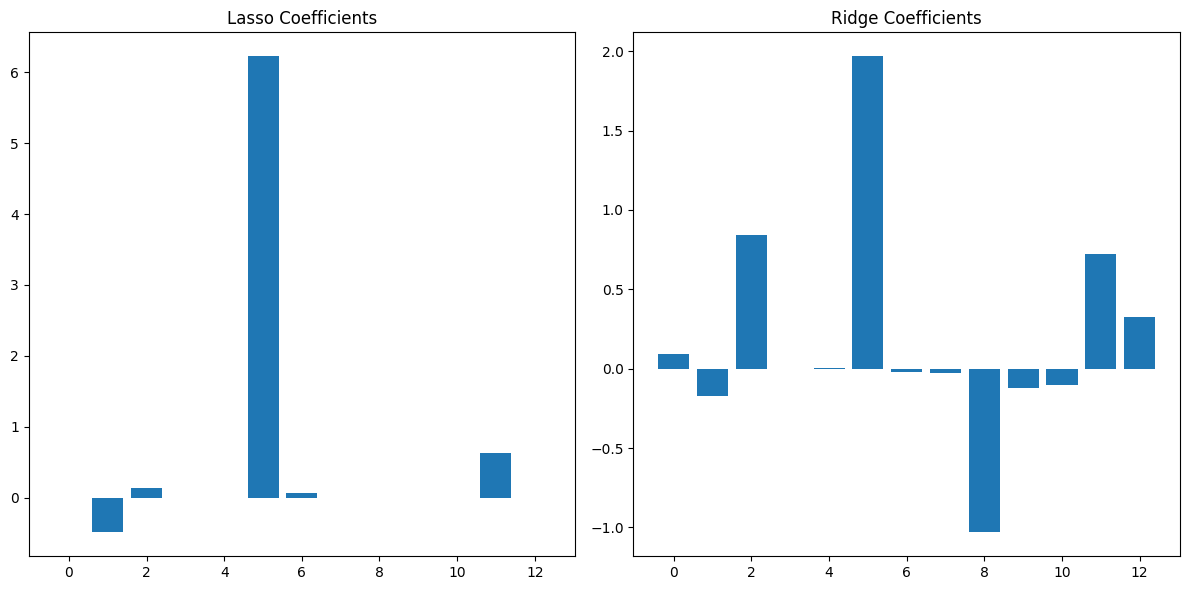

In [23]:
# Print the results
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")

# Plotting the coefficients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.title("Lasso Coefficients")
plt.subplot(1, 2, 2)
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.title("Ridge Coefficients")
plt.tight_layout()
plt.show()